In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class SweepFrequency:
    def __init__(self, low, high, period, reset_tol: float = 1e-1):
        self._l = low
        self._h = high
        self._p = period
        self._phase = 0
        self._t = 0
        self._tol = reset_tol

    def __call__(self, dt):
        self._t += dt
        if (np.abs(self._phase) < self._tol or 
            np.abs(self._phase - 2 * np.pi) < self._tol) and self._t > self._p:
            print("reset")
            self._t = 0
        t = self._t
        hl_ratio = self._h / self._l
        self._phase = (
            (2 * np.pi * self._l * self._p)
            * (np.exp(t * np.log(hl_ratio) / self._p) - 1)
            / np.log(hl_ratio)
        ) % (2 * np.pi)
        return np.sin(self._phase)

In [3]:
ts = np.linspace(0, 10, 10001)
ts

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 9.998e+00, 9.999e+00,
       1.000e+01])

In [4]:
sf = SweepFrequency(1, 5, 1, reset_tol=1e-1)

In [5]:
v = []
for t in ts:
    v.append(sf(1e-3))

reset
reset
reset
reset
reset
reset
reset
reset
reset


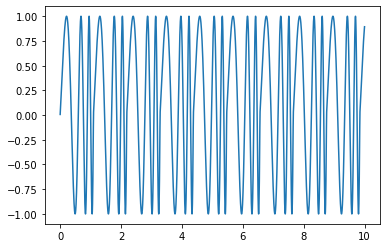

In [6]:
plt.plot(ts, v)

In [7]:
sf._phase

1.1061328216329196

In [8]:
import sysid_tools

In [9]:
adder = sysid_tools.Add()
adder.call(2, 3)

5.0

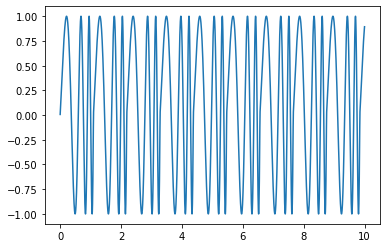

In [10]:
ess = sysid_tools.ExponentialSweptSine(1, 5, 1, 0.1)
ts = np.linspace(0, 10, 10001)
v = []
for t in ts:
    v.append(ess.step(1e-3))
plt.plot(ts, v)

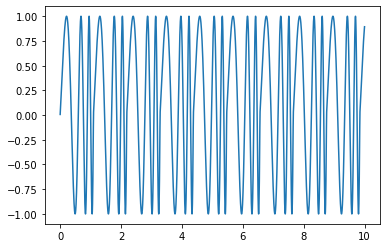

In [12]:
ts = np.linspace(0, 10, 10001)
v = []
ess.reset()
for t in ts:
    v.append(ess.step(1e-3))
plt.plot(ts, v)